# 图结构

图是各种关系的节点和边的集合，节点是与对象对应的顶点，边是对象之间的连接

SciPy 提供了 scipy.sparse.csgraph 模块来处理图结构

## 邻接矩阵

邻接矩阵（Adjacency Matrix）是表示顶点之间相邻关系的矩阵

邻接矩阵逻辑结构分为两部分：V 和 E 集合，其中，V 是顶点，E 是边，边有时会有权重，表示节点之间的连接强度

用一个一维数组存放图中所有顶点数据，用一个二维数组存放顶点间关系（边或弧）的数据，这个二维数组称为邻接矩阵

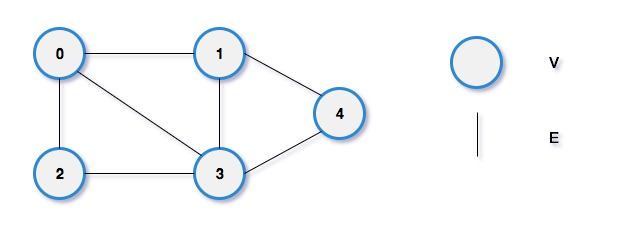

邻接矩阵又分为有向图邻接矩阵和无向图邻接矩阵

无向图是双向关系，边没有方向
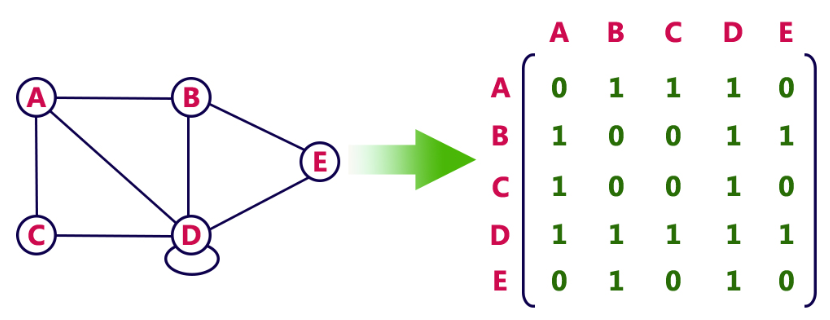

有向图的边带有方向，是单向关系
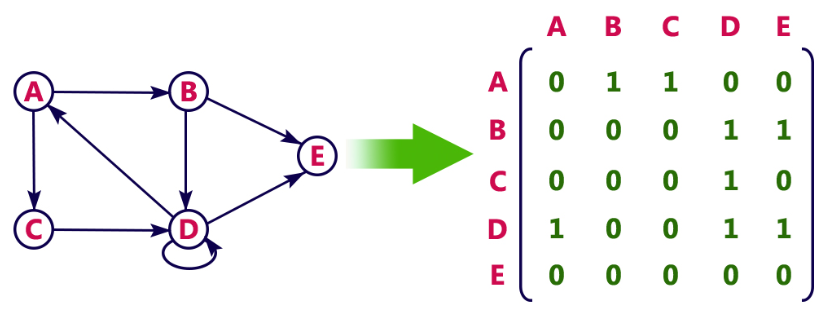

 D 节点是自环，自环是指一条边的两端为同一个节点

In [1]:
import numpy as np
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(newarr)

  (0, 1)	1
  (0, 2)	2
  (1, 0)	1
  (2, 0)	2


In [2]:
# 查看所有连接组件
connected_components(newarr)

(1, array([0, 0, 0]))

## 最短路径算法

Dijkstra(迪杰斯特拉)最短路径算法，用于计算一个节点到其他所有节点的最短路径

Scipy 使用 dijkstra() 方法来计算一个元素到其他元素的最短路径
- return_predecessors 布尔值，设置 True，遍历所有路径，如果不想遍历所有路径可以设置为 False
- indices 元素的索引，返回该元素的所有路径
- limit 路径的最大权重

In [5]:
import numpy as np
from scipy.sparse.csgraph import dijkstra
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

dijkstra(newarr, return_predecessors=True, indices=0)

(array([0., 1., 2.]), array([-9999,     0,     0]))

## 弗洛伊德算法

弗洛伊德算法算法是解决任意两点间的最短路径的一种算法

Scipy 使用 floyd_warshall() 方法来查找所有元素对之间的最短路径

In [6]:
import numpy as np
from scipy.sparse.csgraph import floyd_warshall
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

floyd_warshall(newarr, return_predecessors=True)

(array([[0., 1., 2.],
        [1., 0., 3.],
        [2., 3., 0.]]),
 array([[-9999,     0,     0],
        [    1, -9999,     0],
        [    2,     0, -9999]]))

## 贝尔曼-福特算法

贝尔曼-福特算法是解决任意两点间的最短路径的一种算法

Scipy 使用 bellman_ford() 方法来查找所有元素对之间的最短路径，通常可以在任何图中使用，包括有向图、带负权边的图

In [7]:
import numpy as np
from scipy.sparse.csgraph import bellman_ford
from scipy.sparse import csr_matrix

arr = np.array([
  [0, -1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

bellman_ford(newarr, return_predecessors=True, indices=0)

(array([ 0., -1.,  2.]), array([-9999,     0,     0]))

## 深度优先顺序

depth_first_order() 方法从一个节点返回深度优先遍历的顺序，可以接收的参数：
- 图
- 图开始遍历的元素

In [8]:
import numpy as np
from scipy.sparse.csgraph import depth_first_order
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)

# 给定一个邻接矩阵，返回深度优先遍历的顺序
depth_first_order(newarr, 1)

(array([1, 0, 3, 2]), array([    1, -9999,     1,     0]))

## 广度优先顺序

breadth_first_order() 方法从一个节点返回广度优先遍历的顺序，可以接收以下参数：
- 图
- 图开始遍历的元素

In [9]:
import numpy as np
from scipy.sparse.csgraph import breadth_first_order
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)

# 给定一个邻接矩阵，返回广度优先遍历的顺序
breadth_first_order(newarr, 1)

(array([1, 0, 2, 3]), array([    1, -9999,     1,     1]))